In [4]:
import ipyparallel as parallel
client = parallel.Client(profile='default2')
view = client.load_balanced_view()
len(client.ids)

128

In [5]:
%%px
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
%%px --local
from ase.io import read
import numpy as np


In [98]:
%%px --local
def get_t_corr(dt, path, lim):
    
    basepath = '/gpfs/scratch/smdick/'
    trajectories = read(basepath + path, lim)
    v = []
    all_v = []
    for i, traj in enumerate(trajectories[int(dt):]):
        v1 = traj.get_velocities()[::3]
        all_v.append(np.mean(np.einsum('ij,ij -> i' , v1, v1)))
    #         v1 = v1/np.tile(np.linalg.norm(v1, axis = 1).reshape(-1,1)**2,[1,3])
        v2 = trajectories[i].get_velocities()[::3]
        v.append(np.mean(np.einsum('ij,ij -> i' , v1, v2)))
#         v.append(v1.dot(v2))
    return np.mean(v)/np.mean(all_v)

In [108]:

paths = ['mbpol/md_siesta_pure/md_siesta_10.traj',
         'new/md_siesta_uftodz_5/md_siesta.traj',
         'new/md_siesta_uftodz_8/md_siesta.traj',
         'new/md_siesta_uftodz_10/md_siesta.traj',
         'new/md_siesta_uftodz_inf/md_siesta.traj',
         'mbpol/nose_128_10.traj']

limits = ['2000:8000:2']* len(paths)
v_corr_dict = {}

for path, lim in zip(paths, limits):
    trajectories = read(basepath + path, lim)
    name = path.split('/')[-2]
    dt = np.arange(1,200,1).astype(int)
    v_corr_dict[name] = view.map_sync(get_t_corr, dt, [path]*len(dt), [lim]*len(dt))

# plot(v_corr)

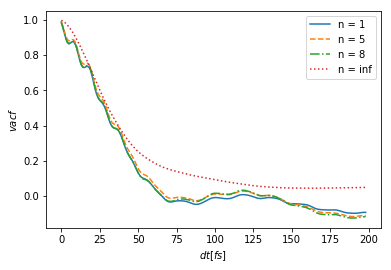

In [119]:
skip = ['md_siesta_uftodz_10', 'mbpol']
# skip = ['mbpol']
labels = ['n = 1' , 'n = 5', 'n = 8', 'n = 10', 'n = inf']
styles = ['-','--','-.',':',':']
for key, name, style in zip(v_corr_dict,labels, styles):
    if key in skip: continue
#     sum_ = np.sum(v_corr_dict[key])/(fs**2)/1000
    plot(v_corr_dict[key], label = name, ls = style )
ylabel('$vacf$')
xlabel('$dt [fs]$')
legend()
savefig('../figs/vacf_uftodz.eps', bbox_inches = 'tight')
savefig('../figs/vacf_uftodz.pdf', bbox_inches = 'tight')

In [83]:
from ase.units import fs, Ang

In [80]:
fs

0.09822694788464063

In [84]:
Ang

1.0